$\Delta u + k^2(1+q) u = f $ in $\Omega = [0,1]^2$    
$u = 0 $ on $\partial \Omega$

In [1]:
import scipy as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [1]:
k = 1   # wavenumber
N = 210 # 格点数
h = 1/N # 间隔

In [2]:
def q_gen_example(N):
    q = np.zeros((N+1,N+1))
    q_value = 0.02
    x1,x2,x3,y1,y2,y3,y4 = 0.2,0.4,0.7,0.2,0.3,0.6,0.7
    q[int(x1*N):int(x2*N),int(y1*N):int(y4*N)] = q_value
    q[int(x2*N):int(x3*N),int(y2*N):int(y3*N)] = q_value
    return q
def q_generation(N,method = 1):
    if method == 1:
        return q_gen_example(N)
    print('method error')
q = q_generation(N)

In [3]:
sns.heatmap(q, xticklabels=False, yticklabels=False)

NameError: name 'sns' is not defined

In [4]:
def f_generation(N,method = 1):
    if method == 1:
        return f_gen_example(N)
    print('method error')
def f_gen_example(N):
    f = np.zeros((N-1,N-1))
    for i in range(N-1):
        for j in range(N-1):
            f[i,j] = np.exp(-((i+1)+(j+1))/N)  # f(x,y) = exp(-(x+y))
    return f
f = f_generation(N)

<AxesSubplot:>

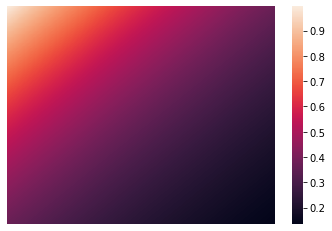

In [6]:
sns.heatmap(f,xticklabels=False,
                 yticklabels=False)

### Method1  
$u_{i,j}^{n+1} = \frac{1}{4}[(u_{i+1,j}^n +u_{i-1,j}^n +u_{i,j+1}^n +u_{i,j-1}^n )+h^2(1+q_{i,j})u_{i,j}^n - h^2 f_{i,j}]$

In [7]:
def Method_1(q,f,N,nt = 100):
    h = 1/N
    u = np.zeros((N + 1, N + 1))
    for it in range(nt):
        uu = u.copy()
        u[1:-1, 1:-1] = (
            uu[1:-1, 2:] + uu[1:-1, :-2] + uu[2:, 1:-1] + uu[:-2, 1:-1] + h * h *
            (1 + q[1:-1, 1:-1]) * uu[1:-1, 1:-1] - h * h * f) / 4
        u[0, :] = 0
        u[-1, :] = 0
        u[:, 0] = 0
        u[:, -1] = 0
    err1 = np.linalg.norm(np.abs(uu-u),ord = 2)/(N-1)**2
    err2 = u[1:-1, 2:] + u[1:-1, :-2] + u[2:, 1:-1] + u[:-2, 1:-1] - h * h * (
    1 + q[1:-1, 1:-1]) * u[1:-1, 1:-1] - h * h * f - 4 * u[1:-1, 1:-1]
    return u,err1,np.abs(err2).max()

### Method2
$u_{i,j}^{n+1} = [(u_{i+1,j}^n +u_{i-1,j}^n +u_{i,j+1}^n +u_{i,j-1}^n ) - h^2 f_{i,j}]/[4-h^2(1+q_{i,j})]$

In [8]:
def Method_2(q,f,N,nt = 100):
    h = 1/N
    u = np.zeros((N + 1, N + 1))
    for it in range(nt):
        uu = u.copy()
        u[1:-1, 1:-1] = (
            uu[1:-1, 2:] + uu[1:-1, :-2] + uu[2:, 1:-1] + uu[:-2, 1:-1] - h * h * f) / (4-h*h*(1+q[1:-1,1:-1]))
        u[0, :] = 0
        u[-1, :] = 0
        u[:, 0] = 0
        u[:, -1] = 0
    err1 = np.linalg.norm(np.abs(uu-u),ord = 2)/(N-1)**2
    err2 = u[1:-1, 2:] + u[1:-1, :-2] + u[2:, 1:-1] + u[:-2, 1:-1] - h * h * (
    1 + q[1:-1, 1:-1]) * u[1:-1, 1:-1] - h * h * f - 4 * u[1:-1, 1:-1]
    return u,err1,np.abs(err2).max()

In [9]:
def result(N,nt):
    q = q_generation(N)
    f = f_generation(N)
    u1 = Method_1(q,f,N,nt)
    u2 = Method_2(q,f,N,nt)
    print(u1[1],u1[2])
    print(u2[1],u2[2])
    figure, ax = plt.subplots(1, 2, figsize=(12, 4))
    figure.tight_layout()
    ax[0].set_title("Method1")
    ax[1].set_title("Method2")
    plt.subplot(121)
    h1 = sns.heatmap(u1[0],
                     xticklabels=False,
                     yticklabels=False)
    plt.subplot(122)
    h2 = sns.heatmap(u2[0],
                     xticklabels=False,
                     yticklabels=False)

7.378939065255564e-10 5.69228605479255e-06
7.378252747871068e-10 5.692357423786598e-06


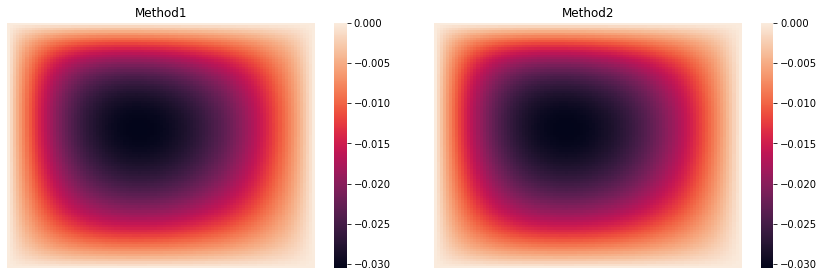

In [10]:
result(100,10000)

3.065522531161328e-09 3.83586672086933e-06
3.065519123810548e-09 3.8358271778060615e-06


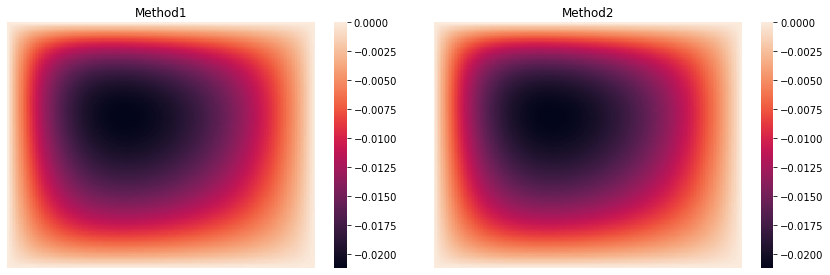

In [11]:
result(200,10000)

7.088888081212912e-10 2.985381690507813e-06
7.088894423913341e-10 2.9853813861215224e-06


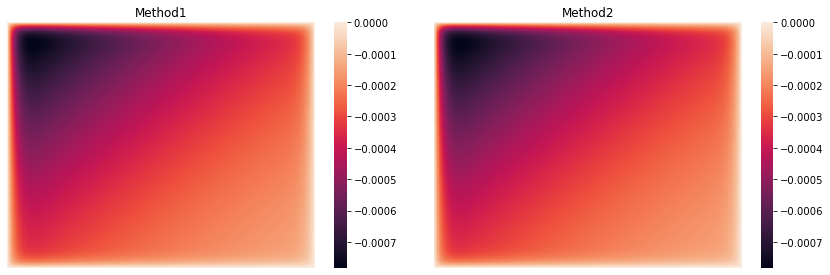

In [12]:
result(512,1000)